In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

**READING DATASET :**

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**NULL VALUES:**

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

**Thus there are no null values in the dataset.**

**INFORMATION**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

**DESCRIPTIVE STATISTICS**

In [6]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,7973.0,4257.151261,3198.964299,0.000000,1531.000000,3635.000000,6662.000000,10981.000000
V1,7973.0,-0.299740,1.498341,-23.066842,-1.046362,-0.416341,1.122758,1.685314
V2,7973.0,0.295226,1.283914,-25.640527,-0.237359,0.335446,0.950582,8.261750
V3,7973.0,0.899355,1.090297,-12.389545,0.372435,0.948695,1.597949,4.101716
V4,7973.0,0.215736,1.447057,-4.657545,-0.687521,0.223379,1.131542,7.380245


In [7]:
data.shape

(7973, 31)

**Thus there are 284807 rows and 31 columns.**

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**FRAUD CASES AND GENUINE CASES**

In [9]:
fraud_cases=len(data[data['Class']==1])

In [10]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 25


In [11]:
non_fraud_cases=len(data[data['Class']==0])

In [12]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 7947


In [13]:
fraud=data[data['Class']==1]

In [14]:
genuine=data[data['Class']==0]

In [15]:
fraud.Amount.describe()

count      25.000000
mean      106.308400
std       372.676883
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [16]:
genuine.Amount.describe()

count    7947.000000
mean       65.284891
std       194.126547
min         0.000000
25%         4.795000
50%        15.950000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

**EDA**

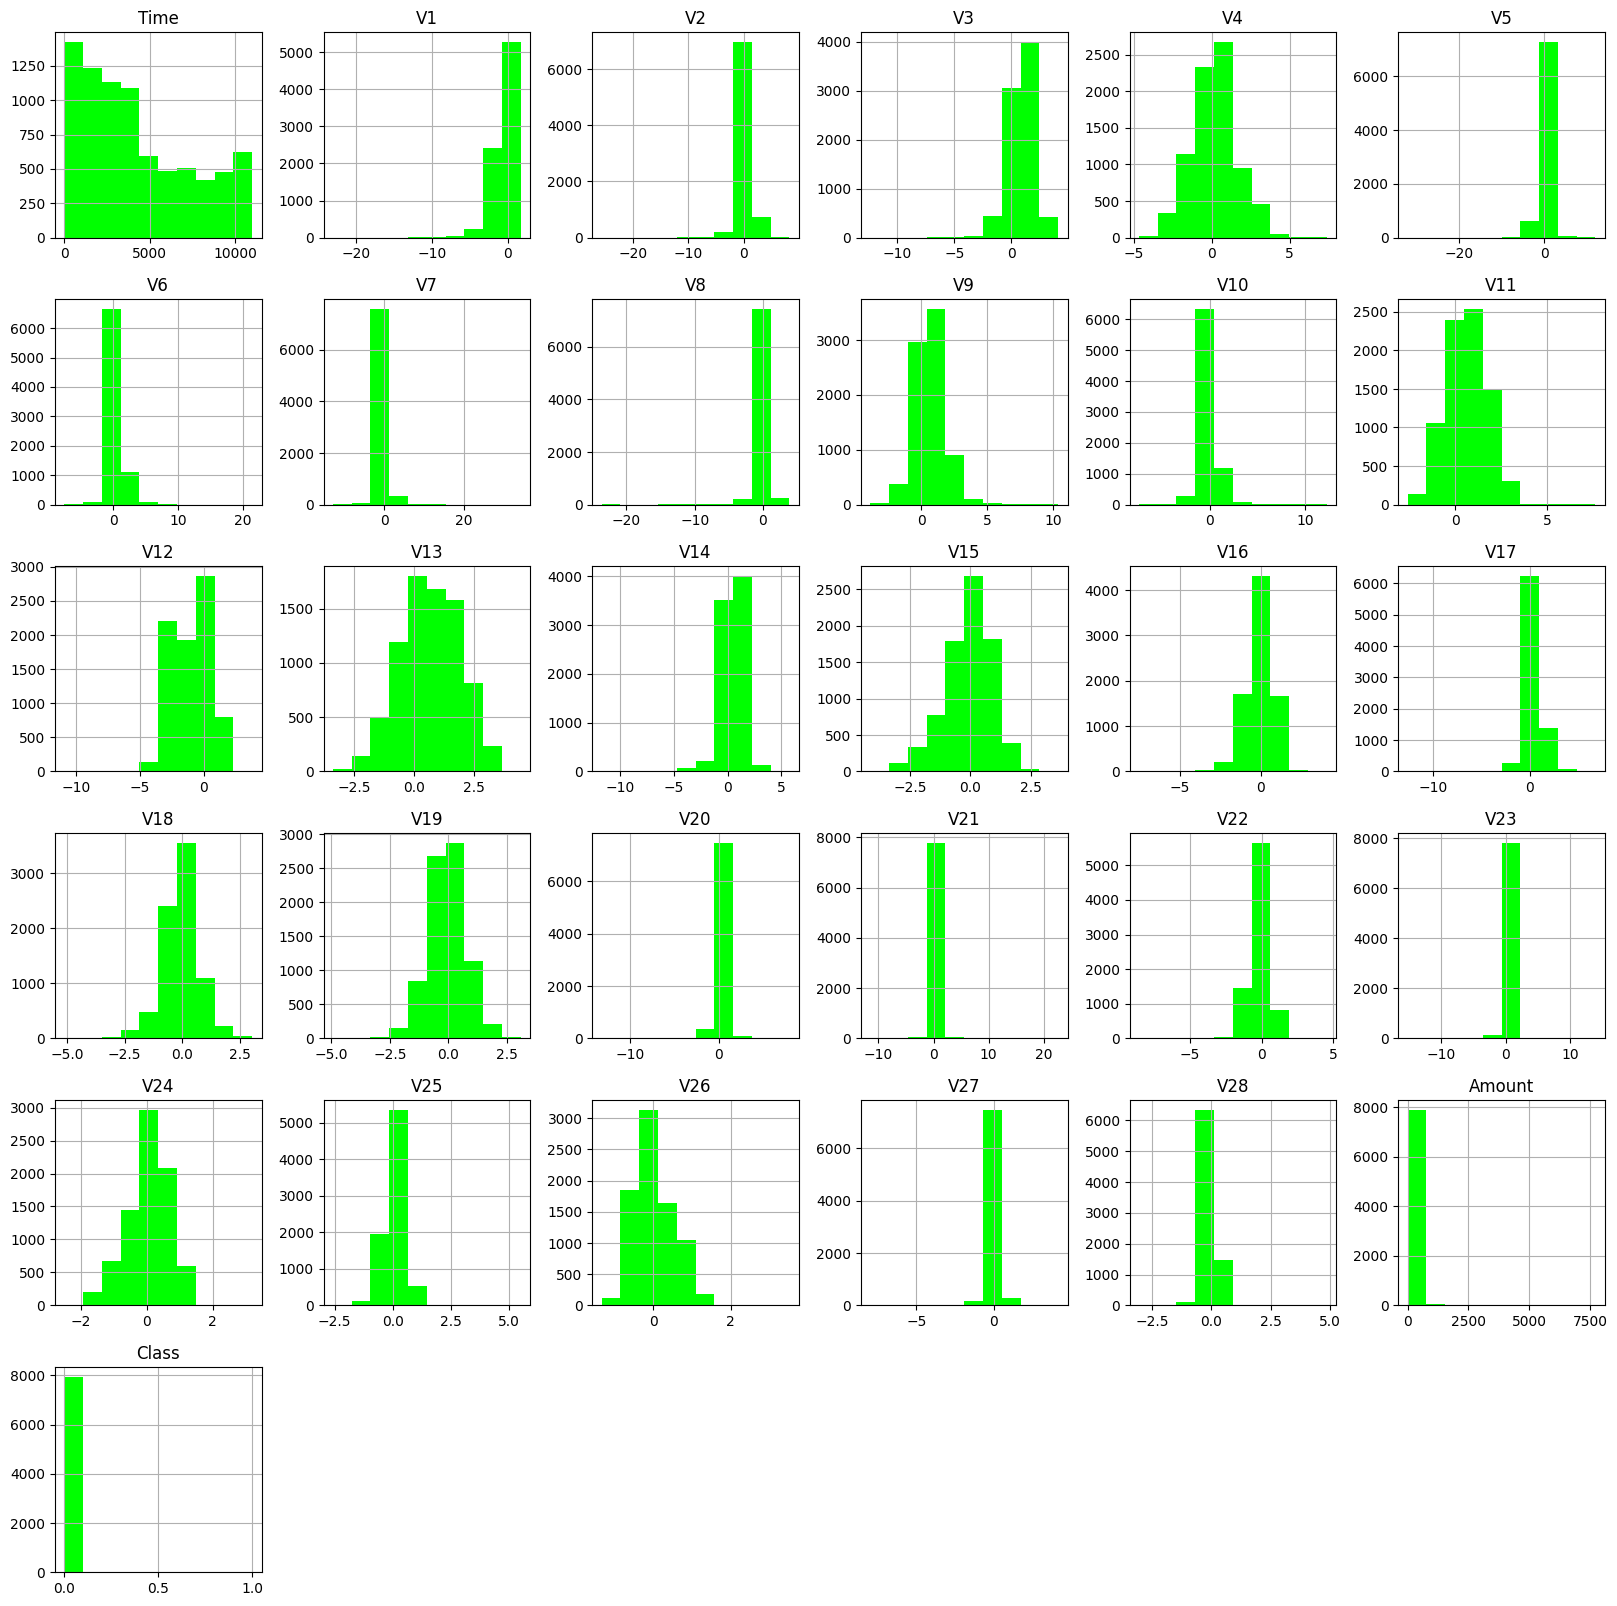

In [17]:
data.hist(figsize=(20,20),color='lime')
plt.show()

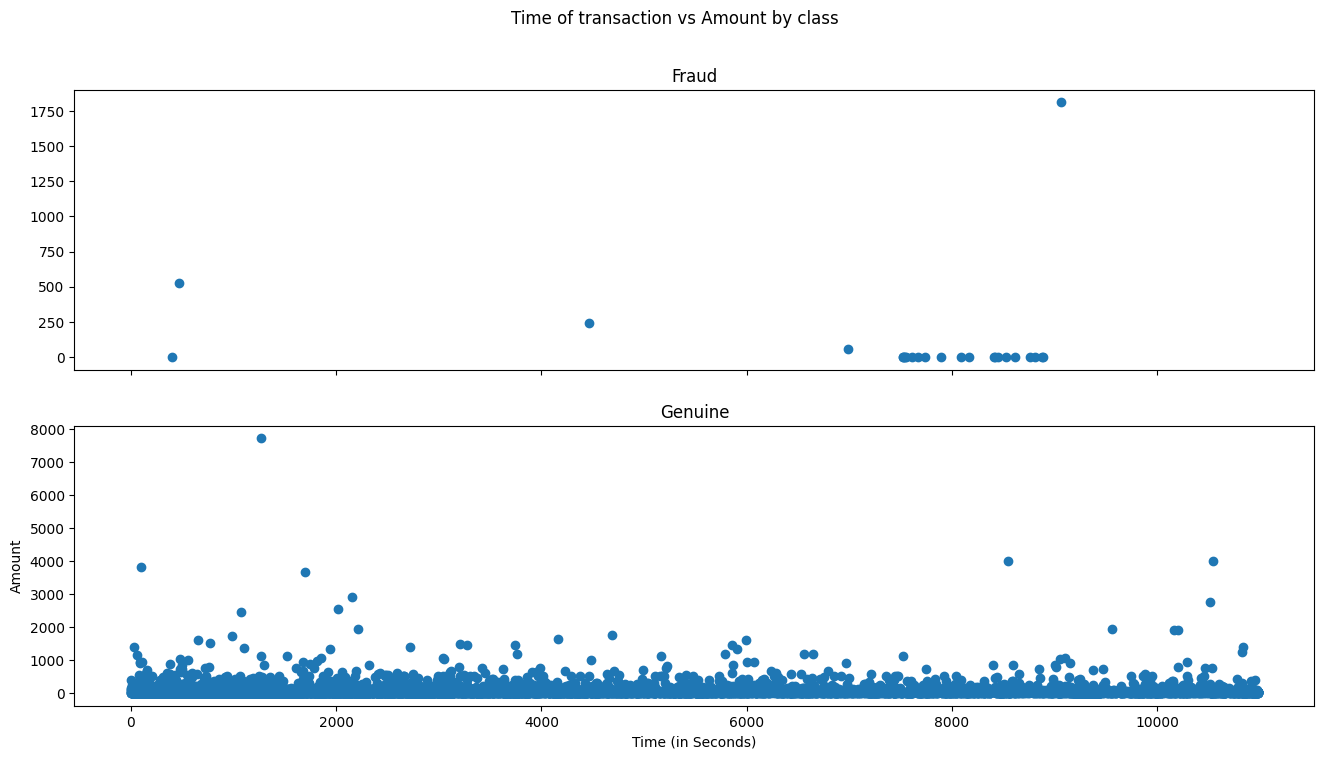

In [18]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


**CORRELATION**

<Axes: >

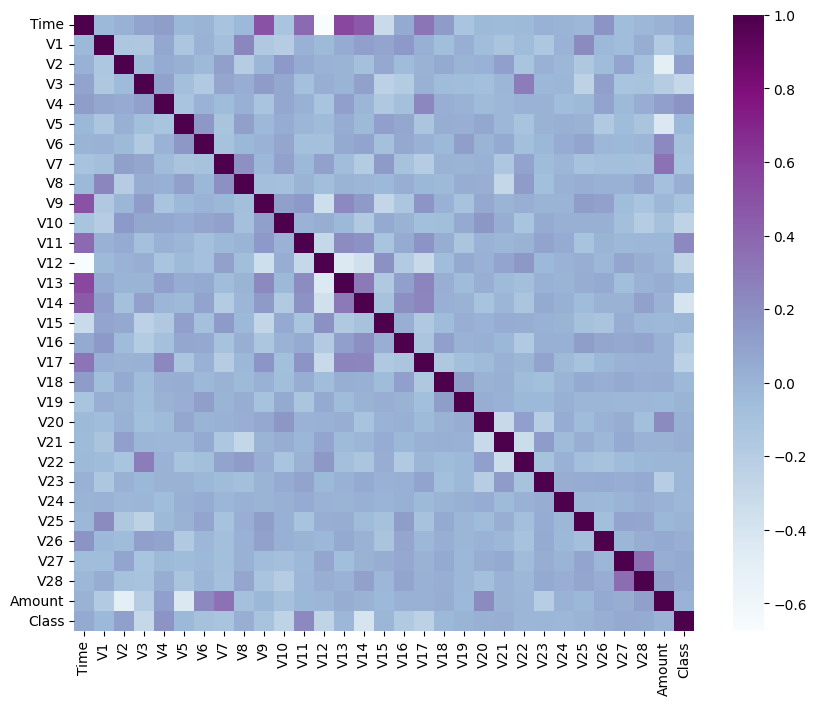

In [19]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

**Let us build our models:**

In [20]:
from sklearn.model_selection import train_test_split

**Model 2:**

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
X1=data.drop(['Class'],axis=1)

In [44]:
y1=data['Class']

In [45]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

In [46]:
lr=LogisticRegression()

In [47]:
model2=lr.fit(X1_train,y1_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
prediction2=model2.predict(X1_test)

In [48]:
accuracy_score(y1_test,prediction2)

NameError: name 'accuracy_score' is not defined

**Model 3:**

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
X2=data.drop(['Class'],axis=1)

In [51]:
y2=data['Class']

In [52]:
dt=DecisionTreeRegressor()

In [53]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)

In [54]:
model3=dt.fit(X2_train,y2_train)

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [55]:
prediction3=model3.predict(X2_test)

NameError: name 'model3' is not defined

In [ ]:
accuracy_score(y2_test,prediction3)

**All of our models performed with a very high accuracy.**